In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

In [7]:
file_path = 'Student_performance_data _.csv'
df = pd.read_csv(file_path)
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [9]:
df.shape

(2392, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


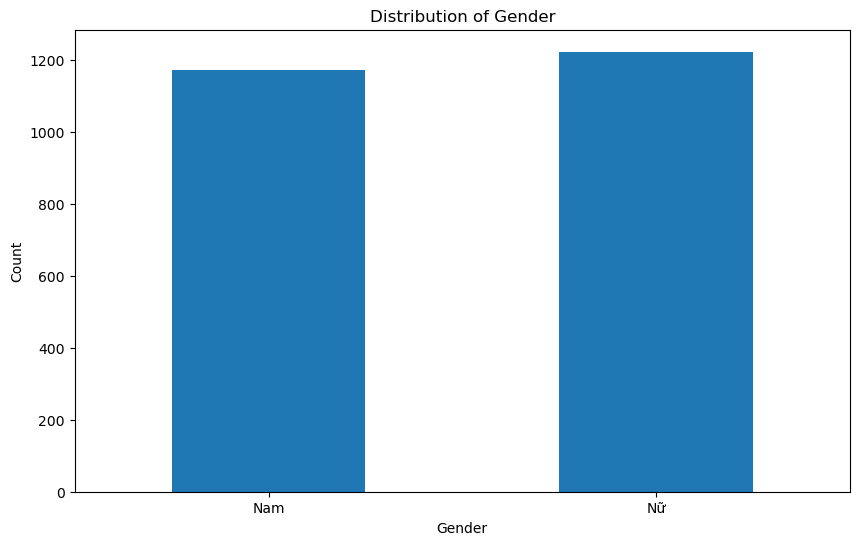

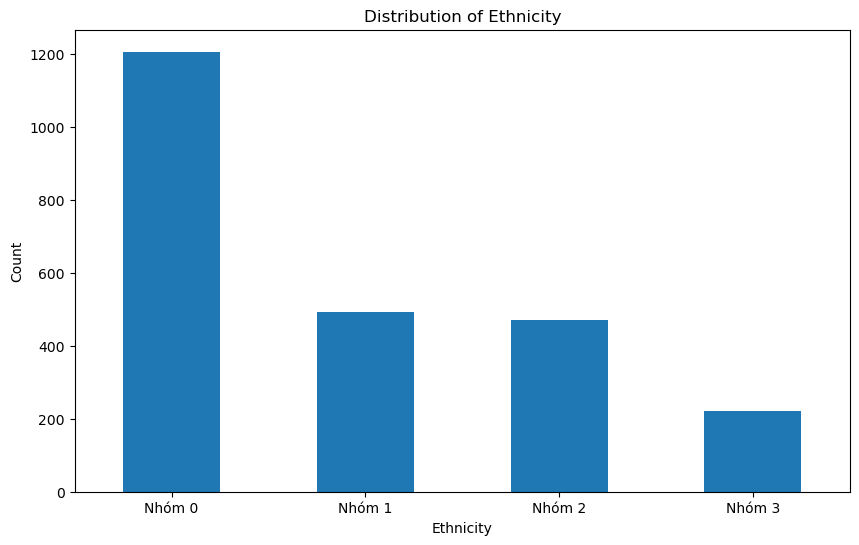

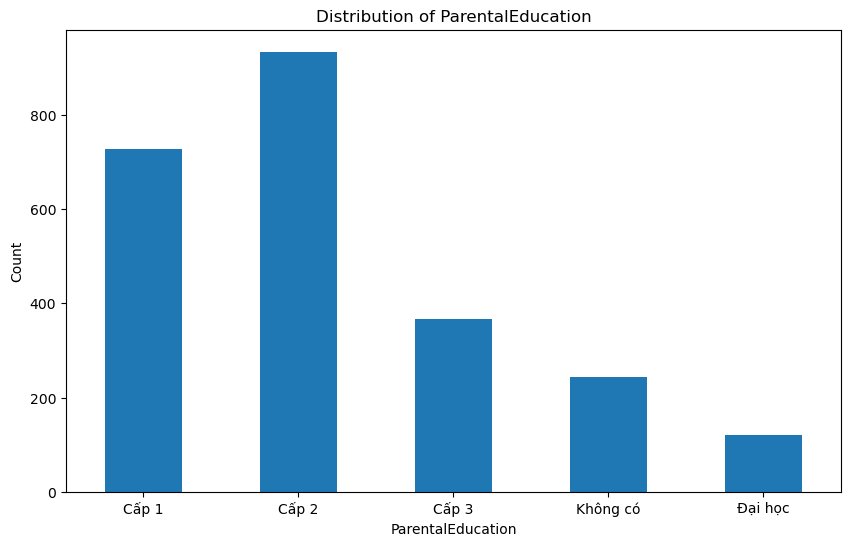

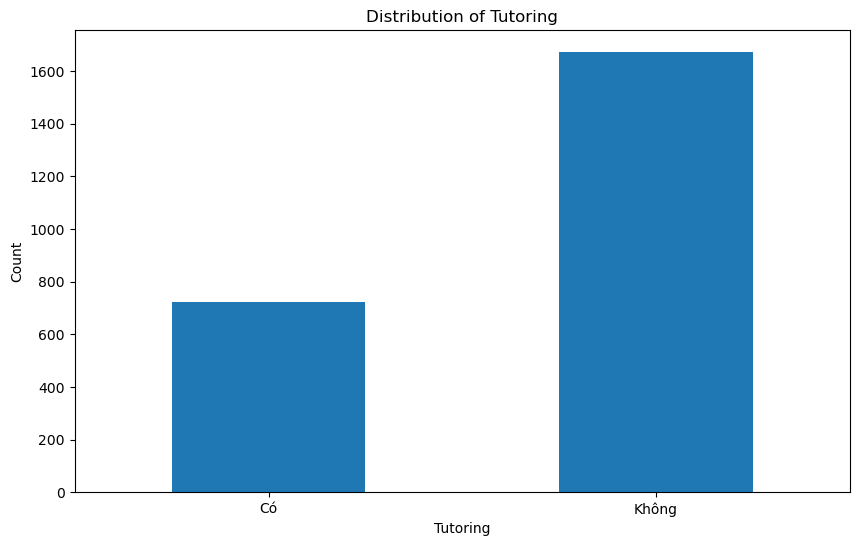

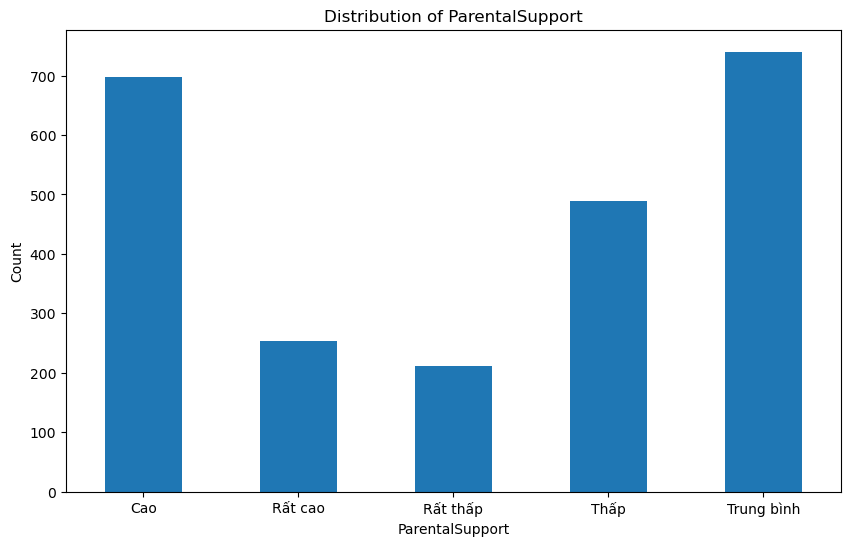

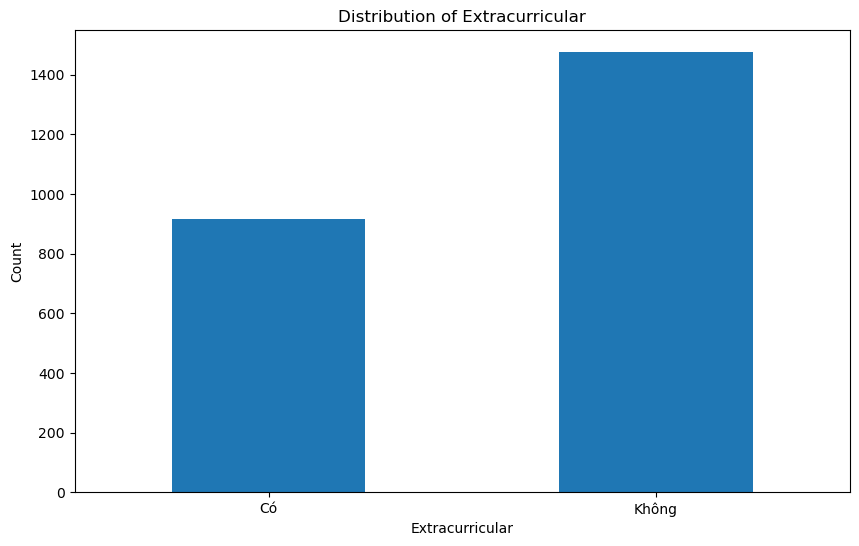

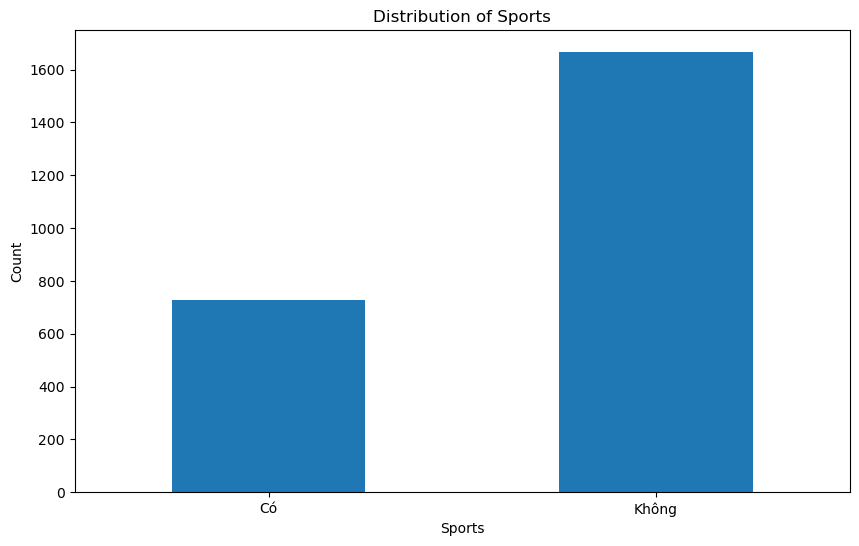

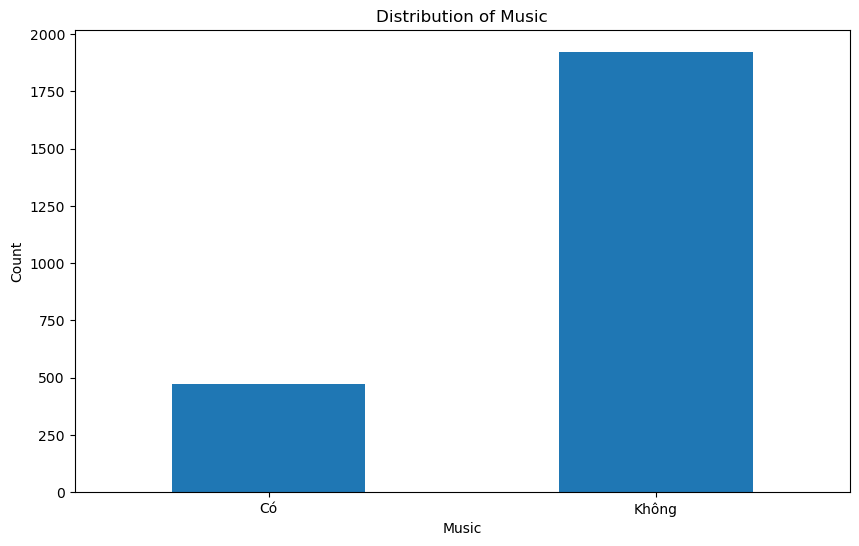

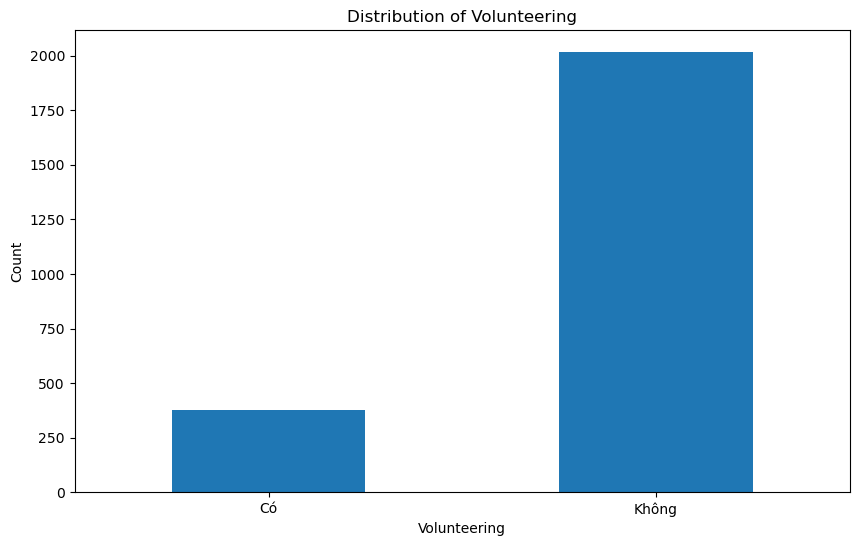

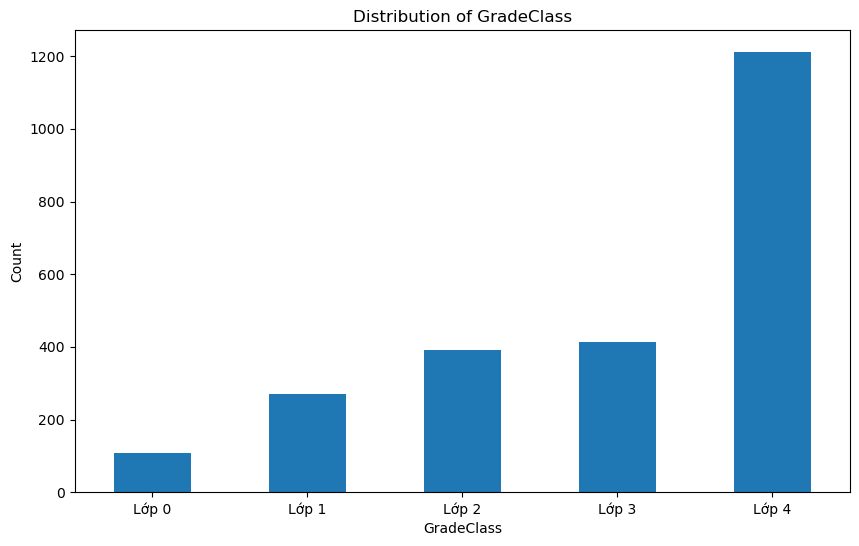

In [27]:
label_dict = {
    'Gender': {0: 'Nam', 1: 'Nữ'},
    'Ethnicity': {0: 'Nhóm 0', 1: 'Nhóm 1', 2: 'Nhóm 2', 3: 'Nhóm 3'},
    'ParentalEducation': {0: 'Không có', 1: 'Cấp 1', 2: 'Cấp 2', 3: 'Cấp 3', 4: 'Đại học'},
    'Tutoring': {0: 'Không', 1: 'Có'},
    'ParentalSupport': {0: 'Rất thấp', 1: 'Thấp', 2: 'Trung bình', 3: 'Cao', 4: 'Rất cao'},
    'Extracurricular': {0: 'Không', 1: 'Có'},
    'Sports': {0: 'Không', 1: 'Có'},
    'Music': {0: 'Không', 1: 'Có'},
    'Volunteering': {0: 'Không', 1: 'Có'},
    'GradeClass': {0: 'Lớp 0', 1: 'Lớp 1', 2: 'Lớp 2', 3: 'Lớp 3', 4: 'Lớp 4'}
    }
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 
                        'ParentalSupport', 'Extracurricular', 'Sports', 
                        'Music', 'Volunteering', 'GradeClass']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    df[feature].map(label_dict[feature]).value_counts().sort_index().sort_index().plot(kind='bar')
    plt.title( f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

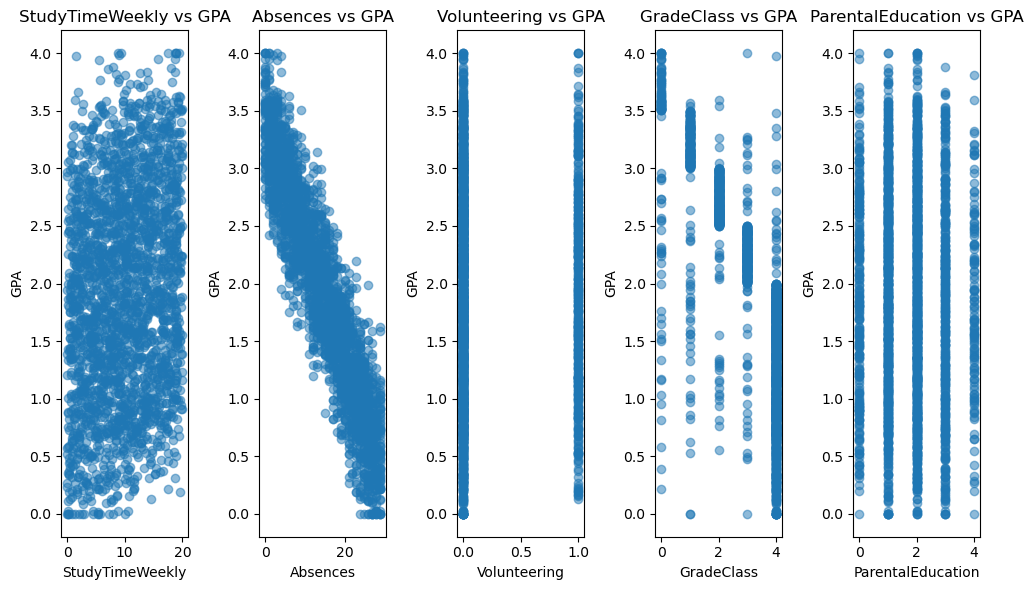

In [47]:
target = 'GPA'
features_to_compare = ['StudyTimeWeekly', 'Absences', 'Volunteering', 'GradeClass','ParentalEducation']
plt.figure(figsize=(10, 6))
for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(1, 5, i)
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
plt.tight_layout()
plt.show()

Cross-validation scores: [0.92167102 0.91906005 0.95039164 0.91099476 0.91623037]
Mean Cross-validation score: 0.9236695692589503
Test set accuracy: 0.9144050104384134


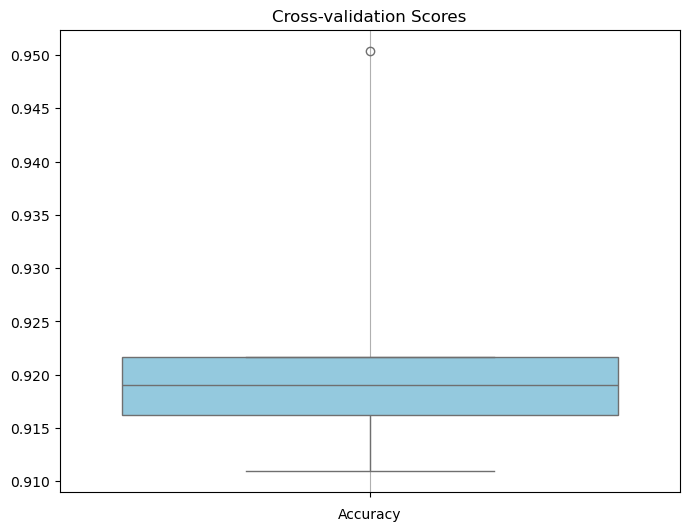

In [73]:
X = df.drop(columns=['GradeClass', 'StudentID'])  
y = df['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Cross-validation score: {cv_scores.mean()}")
print(f"Test set accuracy: {test_accuracy}")
plt.figure(figsize=(8, 6))
sns.boxplot(cv_scores, color='skyblue')
plt.title('Cross-validation Scores')
plt.xlabel('Accuracy')
plt.grid(True, axis='x')
plt.show()

Test set accuracy: 0.9144050104384134

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.50      0.63        22
         1.0       0.83      0.88      0.85        49
         2.0       0.94      0.87      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.89      0.83      0.85       479
weighted avg       0.91      0.91      0.91       479

Confusion Matrix:
[[ 11   4   3   2   2]
 [  1  43   0   1   4]
 [  1   2  74   4   4]
 [  0   2   2  77   5]
 [  0   1   0   3 233]]



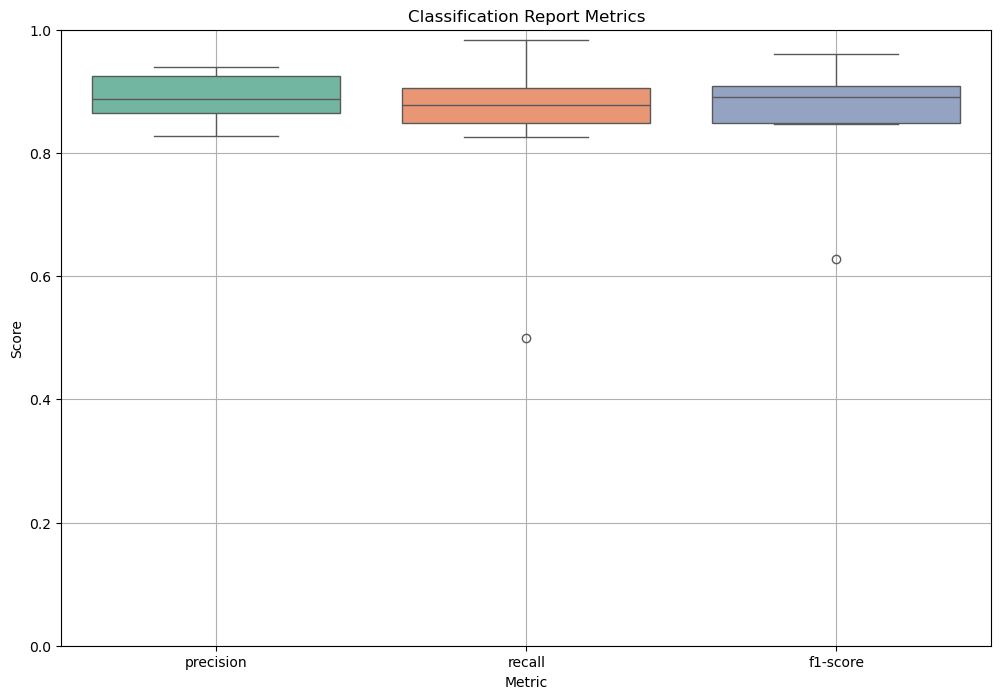

In [87]:
X = df.drop(columns=['GradeClass', 'StudentID'])
y = df['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_mat}\n")
metrics_df = pd.DataFrame(classification_rep).T.iloc[:-1, :-1]
plt.figure(figsize=(12, 8))
metrics_melted = metrics_df.melt(var_name='Metric', value_name='Score')
sns.boxplot(x='Metric', y='Score', data=metrics_melted, hue='Metric', palette='Set2', legend=False)
plt.title('Classification Report Metrics')
plt.ylim(0, 1) 
plt.grid(True)
plt.show()

In [94]:
X = df.drop(columns=['GradeClass', 'StudentID'])
y = df['GradeClass'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') 
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy}")
print(f"Weighted F1 Score: {f1}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

Test set accuracy: 0.9144050104384134
Weighted F1 Score: 0.9113341085413221

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.50      0.63        22
         1.0       0.83      0.88      0.85        49
         2.0       0.94      0.87      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.89      0.83      0.85       479
weighted avg       0.91      0.91      0.91       479


Confusion Matrix:
 [[ 11   4   3   2   2]
 [  1  43   0   1   4]
 [  1   2  74   4   4]
 [  0   2   2  77   5]
 [  0   1   0   3 233]]


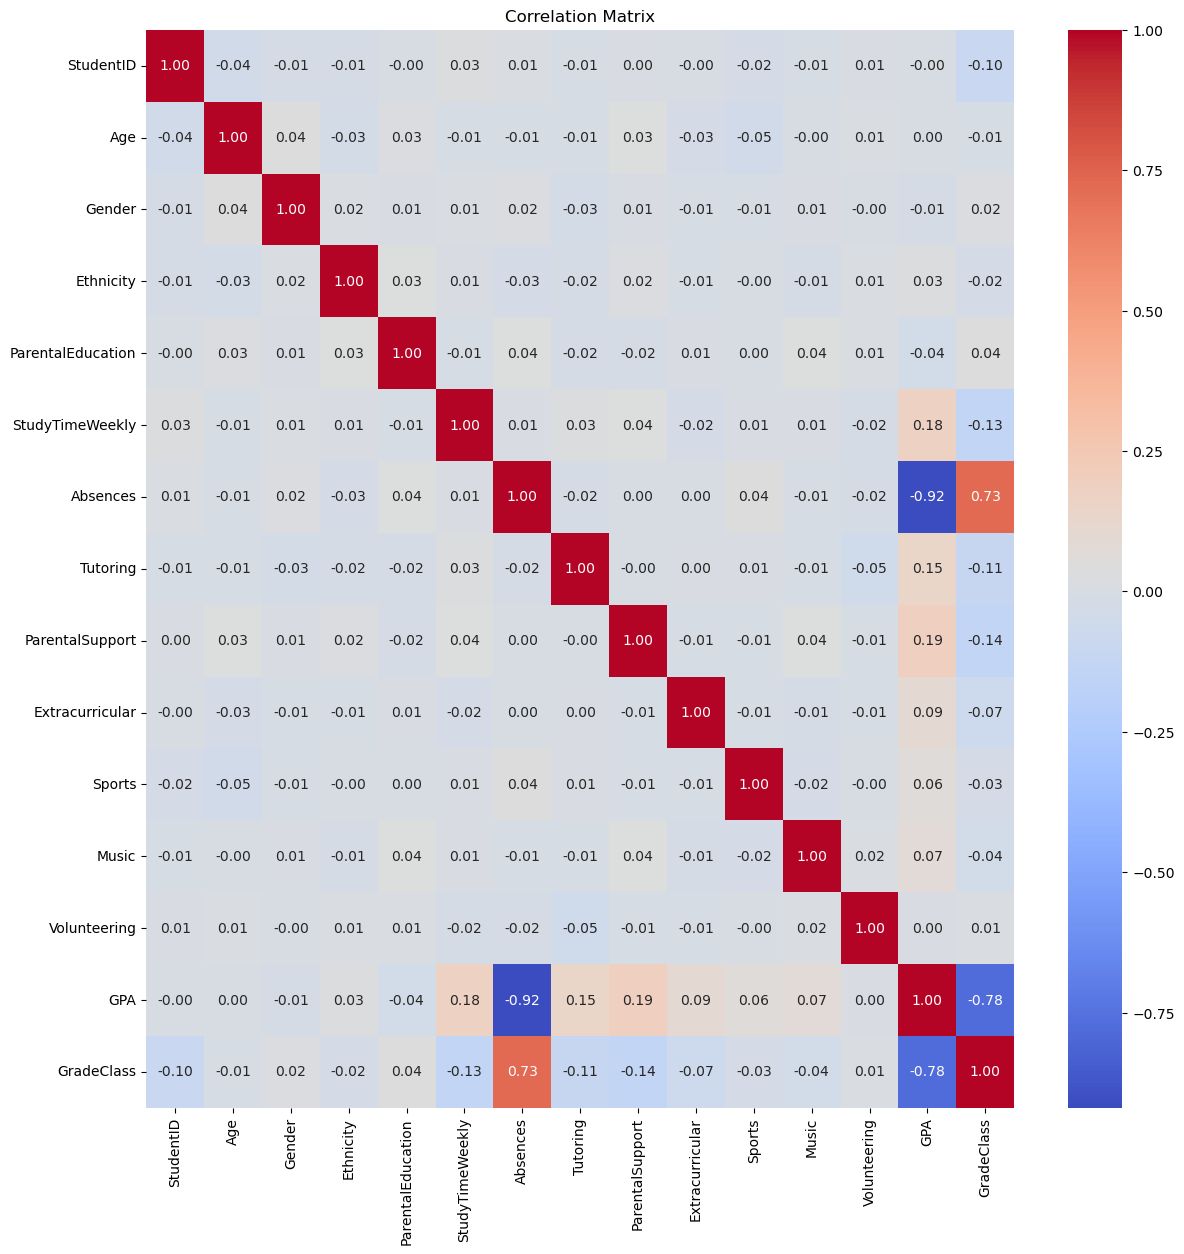

In [96]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

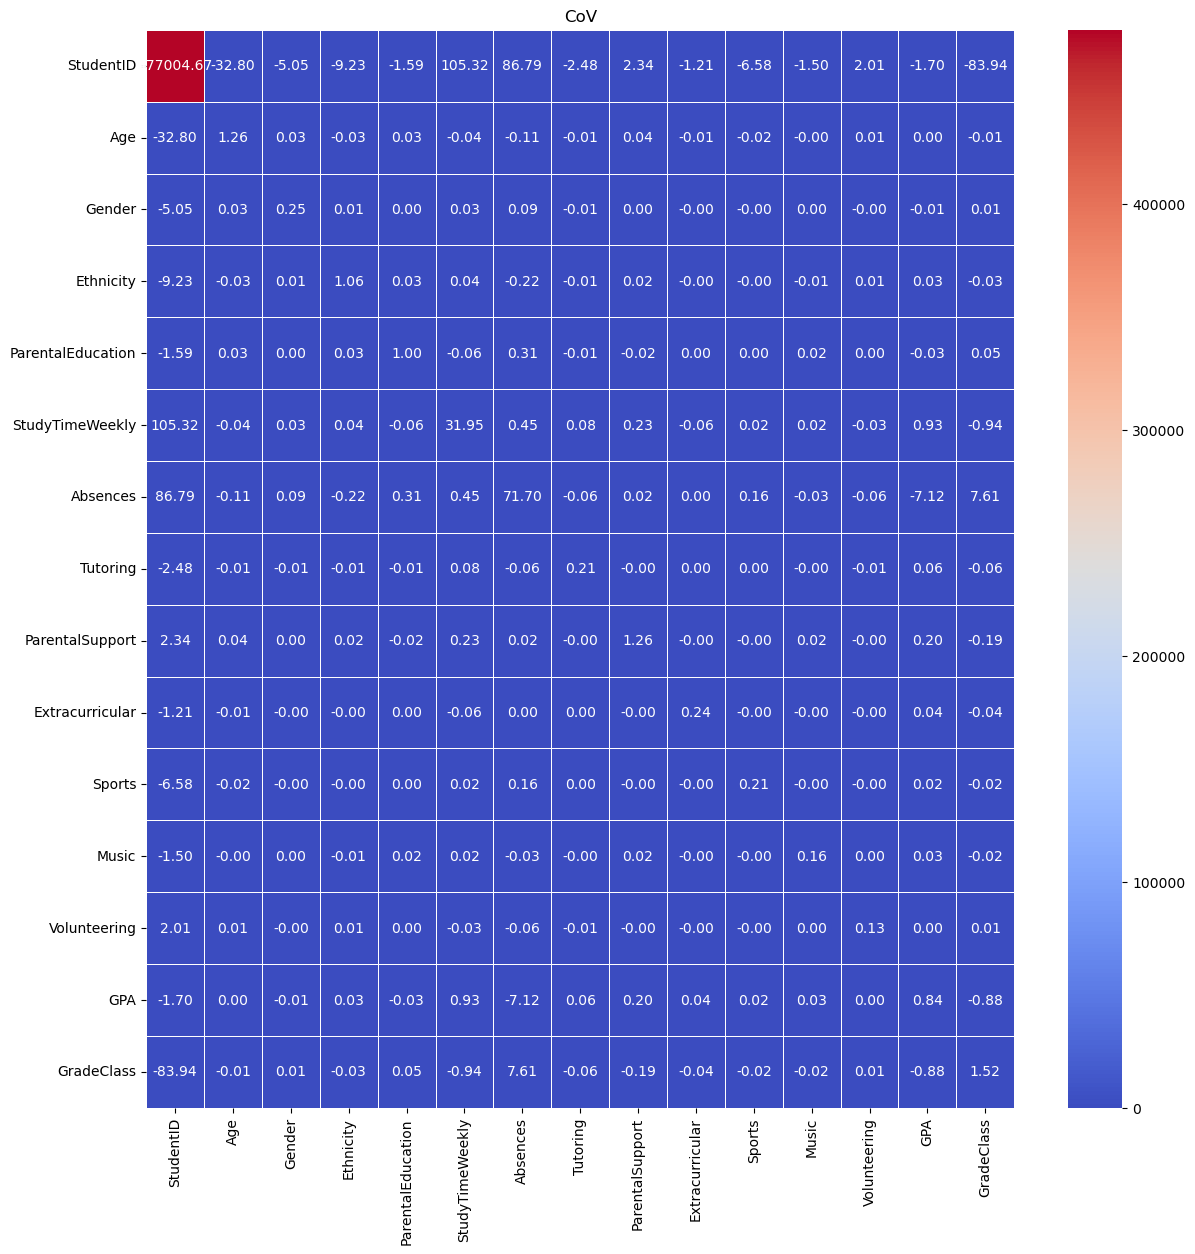

In [98]:
cov_matrix = df.cov()
plt.figure(figsize=(14, 14))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('CoV')
plt.show()